In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import datetime as dt
from technical_generator import Generator

In [2]:
# Define the start and end dates for the data retrieval
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2023, 4, 4)
data = yf.download('AMZN', start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300
2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400


In [4]:
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

In [5]:
import technical_generator
Generator = technical_generator.Generator()

In [6]:
# Add a new columns for the 7, 14 and 21 day exponential moving average (EMA) of the 'Close' price
data['7ma'] = Generator.EMA(data['Close'], 7)
data['14ma'] = Generator.EMA(data['Close'], 14)
data['21ma'] = Generator.EMA(data['Close'], 21)

# Add a new columns for the 7, 14 and 21 day Moving Average Convergence Divergence (MACD) of the 'Close' price
data['7macd'] = Generator.MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator.MACD(data['Close'], 7, 21, 14)

# Add a new columns for the 7, 14 and 21 day Relative Strength Index (RSI) of the 'Close' price
data['7rsi'] = Generator.RSI(data['Close'], 7)
data['14rsi'] = Generator.RSI(data['Close'], 14)
data['21rsi'] = Generator.RSI(data['Close'], 21)

# Add a new columns for Average True Range (ATR) based on the 'High' and 'Low' prices
data['7atr'] = Generator.atr(data['High'], data['Low'], 7)
data['14atr'] = Generator.atr(data['High'], data['Low'], 14)
data['21atr'] = Generator.atr(data['High'], data['Low'], 21)

# Add a new columns for the upper and lower Bollinger Bands based on the 'Close' price and a window of 7, 14 and 21 days
data['7upper'], data['7lower'] = Generator.bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator.bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator.bollinger_band(data['Close'], 21)

# Add a new columns for the 7, 14 and 21 day Relative Strength Value (RSV) based on the 'Close' price
data['7rsv'] = Generator.rsv(data['Close'], 7)
data['14rsv'] = Generator.rsv(data['Close'], 14)
data['21rsv'] = Generator.rsv(data['Close'], 21)

The RSV values are used in technical analysis to identify overbought and oversold conditions in a security. A value of 100 indicates that the security has closed at the highest price over the given time period, while a value of 0 indicates that it has closed at the lowest price over the period. A reading above 70 is typically considered overbought, while a reading below 30 is considered oversold.

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-03,5.856,5.9805,5.828,5.9550,5.9550,248118000,0.008297,0.008262,6.052435,6.138378,...,0.222738,6.400055,5.739374,6.526149,5.802423,6.788483,5.798326,12.389336,10.326621,5.914279
2010-02-04,5.932,6.0165,5.787,5.7970,5.7970,255680000,-0.026532,-0.026891,5.988491,6.091102,...,0.224929,6.431231,5.657627,6.514167,5.732905,6.745856,5.751668,0.000000,0.000000,0.000000
2010-02-05,5.794,5.8825,5.705,5.8695,5.8695,220496000,0.012507,0.012429,5.958713,6.060570,...,0.226048,6.402880,5.609406,6.476599,5.700829,6.707498,5.719264,14.370712,12.425063,8.248033
2010-02-08,5.969,6.0500,5.828,5.8415,5.8415,197804000,-0.004770,-0.004782,5.929388,6.030521,...,0.228238,6.252138,5.628719,6.419914,5.680514,6.683273,5.680774,9.398068,8.333311,5.062556
2010-02-09,5.910,5.9545,5.850,5.9015,5.9015,184460000,0.010271,0.010219,5.922412,6.012891,...,0.222143,5.999847,5.775582,6.372733,5.672338,6.606092,5.684193,66.139430,19.569346,14.544227


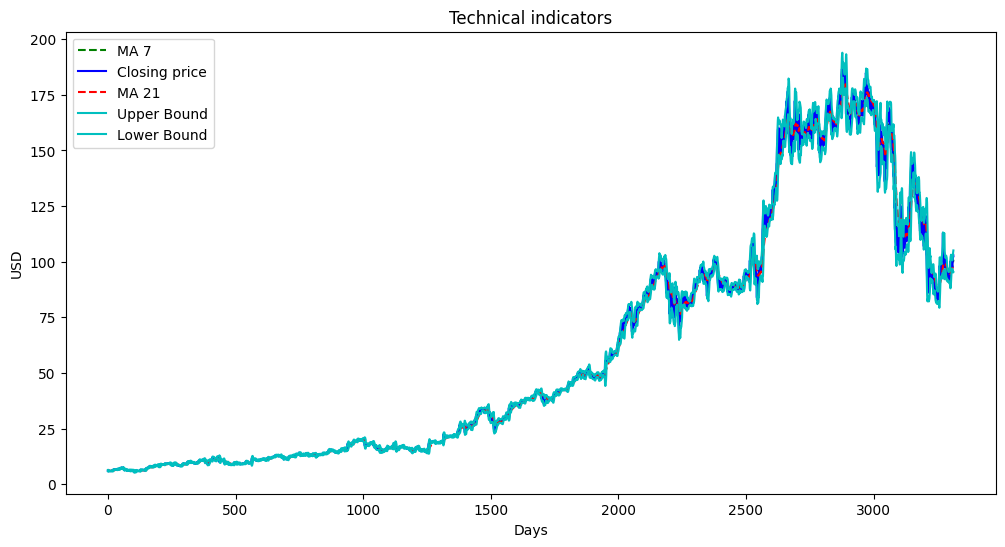

In [8]:
x_ = np.arange(data.shape[0])
plt.figure(figsize=(12, 6))

# plot the Moving Averages (MA), Closing price, and Upper/Lower Bounds
plt.plot(data['7ma'].values, label = 'MA 7', color = 'g', linestyle = '--')
plt.plot(data['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data['21ma'].values, label = 'MA 21', color = 'r', linestyle = '--')
plt.plot(data['7upper'].values, label = 'Upper Bound', color = 'c')
plt.plot(data['7lower'].values, label = 'Lower Bound', color = 'c')

# Fill the area between the Upper and Lower Bounds
plt.fill_between(x_, data['7lower'].values, data['7upper'].values, alpha = 0.35)

# Set title and axis labels, and add legend to the plot
plt.title('Technical indicators')
plt.ylabel('USD')
plt.xlabel('Days')
plt.legend()

c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


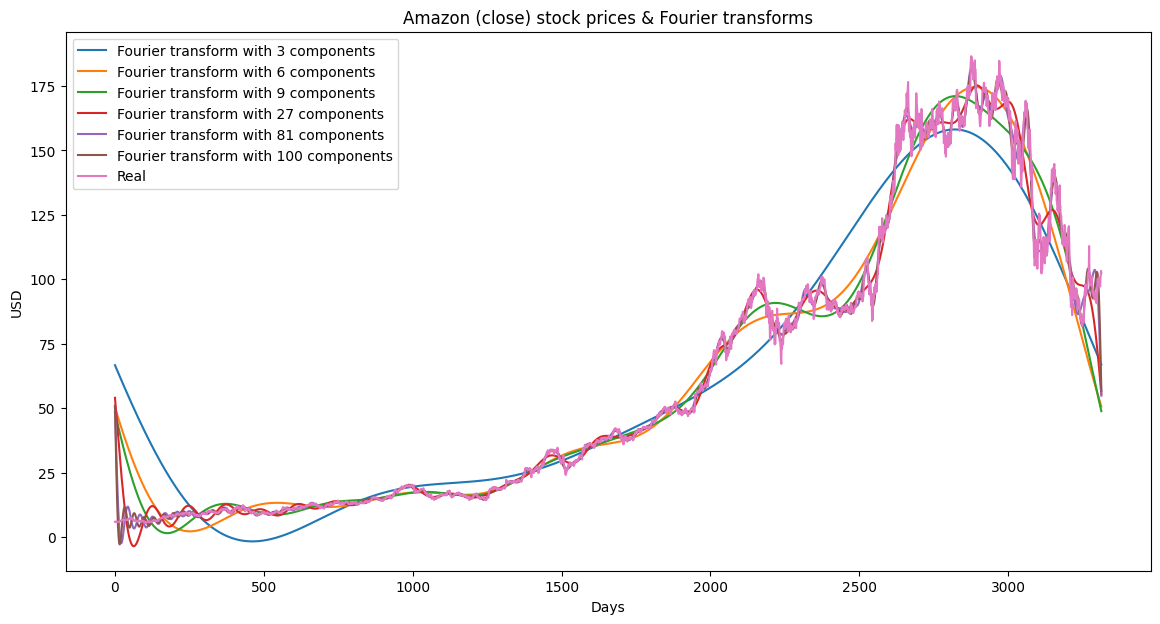

In [9]:
# Compute the fast Fourier transform of the 'Close' column 
close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))

# Create a DataFrame with the Fourier transformed values, their absolute values, and angles
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

# Create a figure for plotting the Fourier transforms
plt.figure(figsize=(14, 7), dpi=100)

# Convert the Fourier transformed values to an array
fft_list = np.asarray(fft_df['fft'].tolist())

# Iterate over a list of integers representing the number of components to keep in the Fourier transform
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); # Create a copy of the Fourier transformed values
    fft_list_m10[num_:-num_] = 0 # Set all but the first and last num_ values in fft_list_m10 to zero
    data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10) # Compute the inverse Fourier transform of fft_list_m10 and store it in a new column in data_combine 
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_)) # Plot the inverse Fourier transform with a label indicating the number of components kept

# Plot the actual 'Close' values from data_combine
plt.plot(data['Close'].values,  label='Real')
# Set the labels and title of the plot, and show the legend
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Amazon (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [10]:
data['FT_3components'] = data['FT_3components'].astype('float')
data['FT_6components'] = data['FT_6components'].astype('float')
data['FT_9components'] = data['FT_9components'].astype('float')
data['FT_27components'] = data['FT_27components'].astype('float')
data['FT_81components'] = data['FT_81components'].astype('float')
data['FT_100components'] = data['FT_100components'].astype('float')
data.head()

c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Anaconda3\envs\AmazonStockPriceForecastingEnvironment\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,7ma,14ma,...,21lower,7rsv,14rsv,21rsv,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-03,5.856,5.9805,5.828,5.9550,5.9550,248118000,0.008297,0.008262,6.052435,6.138378,...,5.798326,12.389336,10.326621,5.914279,66.695630,50.309607,48.345538,54.039535,50.765545,51.059714
2010-02-04,5.932,6.0165,5.787,5.7970,5.7970,255680000,-0.026532,-0.026891,5.988491,6.091102,...,5.751668,0.000000,0.000000,0.000000,66.422721,49.929336,47.838337,52.641398,46.660792,45.371136
2010-02-05,5.794,5.8825,5.705,5.8695,5.8695,220496000,0.012507,0.012429,5.958713,6.060570,...,5.719264,14.370712,12.425063,8.248033,66.150016,49.550120,47.332652,51.235747,42.571350,39.743521
2010-02-08,5.969,6.0500,5.828,5.8415,5.8415,197804000,-0.004770,-0.004782,5.929388,6.030521,...,5.680774,9.398068,8.333311,5.062556,65.877517,49.171968,46.828517,49.823877,38.525957,34.250340
2010-02-09,5.910,5.9545,5.850,5.9015,5.9015,184460000,0.010271,0.010219,5.922412,6.012891,...,5.684193,66.139430,19.569346,14.544227,65.605229,48.794891,46.325966,48.407101,34.553080,28.961891


In [12]:
data.index

DatetimeIndex(['2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08',
               '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12',
               '2010-02-16', '2010-02-17',
               ...
               '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24',
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-03'],
              dtype='datetime64[ns]', name='Date', length=3314, freq=None)

In [11]:
data.to_csv('data.csv')